In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.ticker as ticker
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from numpy.random import uniform
from sklearn.datasets import make_blobs
import seaborn as sns
import random

In [3]:
columnList = """user
churches
resorts
beaches
parks
theatres
museums
malls
zoo
restaurants
pubs/bars
local services
burger/pizza shops
hotels/other lodgings
juice bars
art galleries
dance clubs
swimming pools
gyms
bakeries
beauty & spas
cafes
view points
monuments
gardens"""
columns_list = columnList.split("\n")


In [4]:
df = pd.read_csv('Google_review_ratings.csv',header=0,names = columns_list,index_col=False)
df = df.drop(['user'], axis = 1)
df.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs/bars,...,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


# Exploratory Data Analysis

In [5]:
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   churches               5456 non-null   float64
 1   resorts                5456 non-null   float64
 2   beaches                5456 non-null   float64
 3   parks                  5456 non-null   float64
 4   theatres               5456 non-null   float64
 5   museums                5456 non-null   float64
 6   malls                  5456 non-null   float64
 7   zoo                    5456 non-null   float64
 8   restaurants            5456 non-null   float64
 9   pubs/bars              5456 non-null   float64
 10  local services         5456 non-null   object 
 11  burger/pizza shops     5455 non-null   float64
 12  hotels/other lodgings  5456 non-null   float64
 13  juice bars             5456 non-null   float64
 14  art galleries          5456 non-null   float64
 15  danc

None

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs/bars,...,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,...,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560755
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,...,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171756
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,...,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,...,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,...,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
df['local services'] = pd.to_numeric(df['local services'], errors='coerce')

In [7]:
print('Total missing values in dataset')
display(df.isnull().sum())
df = df.dropna()

Total missing values in dataset


churches                 0
resorts                  0
beaches                  0
parks                    0
theatres                 0
museums                  0
malls                    0
zoo                      0
restaurants              0
pubs/bars                0
local services           1
burger/pizza shops       1
hotels/other lodgings    0
juice bars               0
art galleries            0
dance clubs              0
swimming pools           0
gyms                     0
bakeries                 0
beauty & spas            0
cafes                    0
view points              0
monuments                0
gardens                  1
dtype: int64

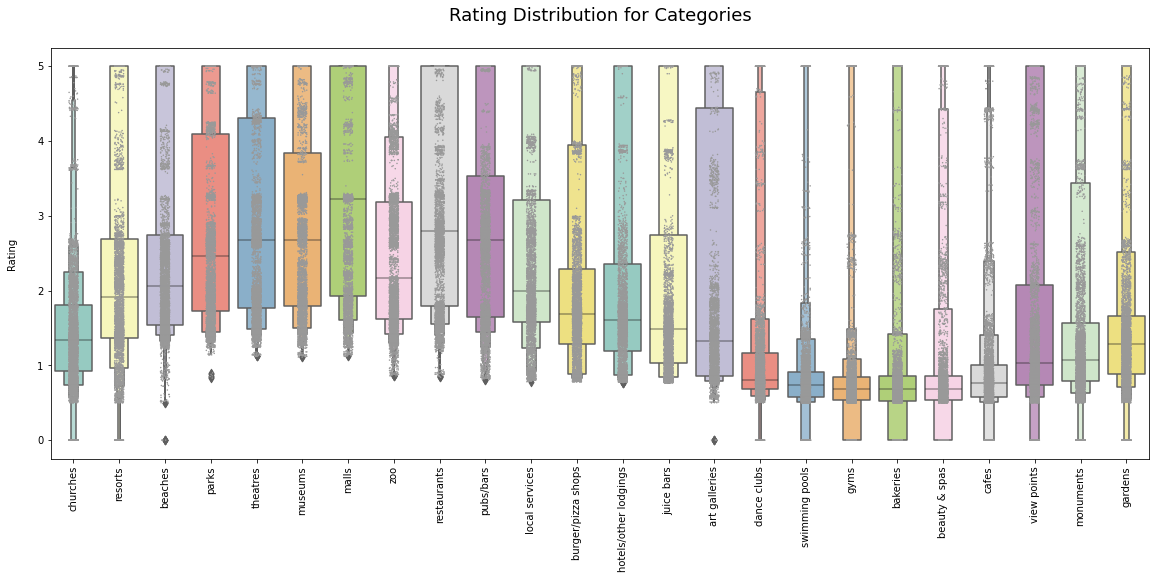

In [8]:
df_transform = pd.melt(df, value_vars=['churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums',
       'malls', 'zoo', 'restaurants', 'pubs/bars', 'local services',
       'burger/pizza shops', 'hotels/other lodgings', 'juice bars',
       'art galleries', 'dance clubs', 'swimming pools', 'gyms', 'bakeries',
       'beauty & spas', 'cafes', 'view points', 'monuments', 'gardens'])

fig = plt.figure(figsize = (16,8))
g = sns.boxenplot(x='variable',y='value',data=df_transform,palette = 'Set3')
g = sns.stripplot(x='variable',y='value',data=df_transform,size=1.5, color=".6")
g.set_xticklabels(g.get_xticklabels(),rotation=90);
g.set_title(f'Rating Distribution for Categories', y = 1.05,fontsize=18)
g.set_xlabel("")
g.set_ylabel("Rating",labelpad = 20)
fig.tight_layout(pad = 0.5)
 

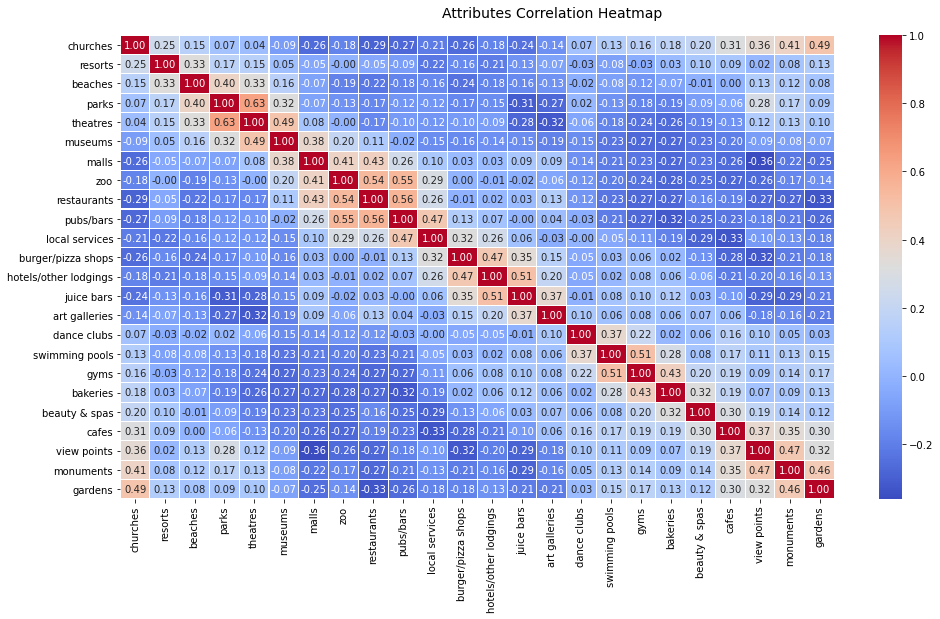

In [8]:
f, ax = plt.subplots(figsize=(16, 8))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Attributes Correlation Heatmap', fontsize=14)

## K-Means Clustering : Find right number of clusters

In [9]:


#Original data
df_original = df

#Scaled Data ??
df_scaled = StandardScaler().fit_transform(df)

#PCA without scaling
pca = PCA(n_components = 5,random_state=42)
df_PCA = pca.fit_transform(df_original)

#PCA with scaling
df_PCA_scaled = pca.fit_transform(df_scaled)

data_list = [df_original,df_scaled,df_PCA,df_PCA_scaled]
inertia_list = []
list_k = list(range(1, 11))

#Run elbow to evaluate number of clusters
for i in range(len(data_list)):
    sse = []
    data = data_list[i]
    for k in list_k:
        km = KMeans(n_clusters=k,random_state=42)
        km.fit(data)
        sse.append(km.inertia_)
    inertia_list.append(sse)

result_ori = pd.DataFrame({'K':list_k,'Inertia':inertia_list[0],'data_type':'original'})
result_ori_scaled = pd.DataFrame({'K':list_k,'Inertia':inertia_list[1],'data_type':'original_scaled'})
result_PCA = pd.DataFrame({'K':list_k,'Inertia':inertia_list[2],'data_type':'PCA'})
result_PCA_scaled = pd.DataFrame({'K':list_k,'Inertia':inertia_list[3],'data_type':'PCA_scaled'})
result = result_ori.append(result_ori_scaled).append(result_PCA).append(result_PCA_scaled)

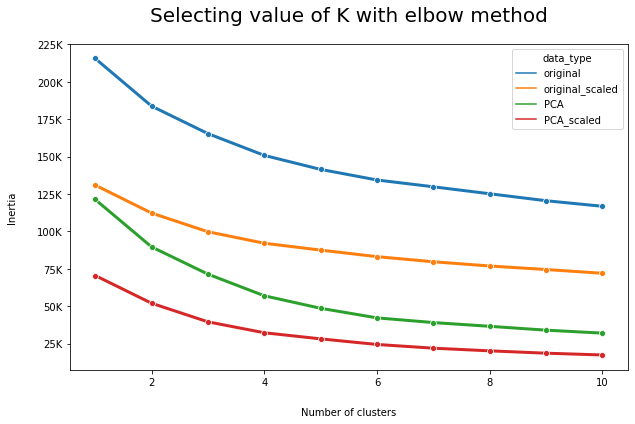

In [10]:
fig = plt.figure(figsize=(10,6))
g = sns.lineplot(data=result,x='K',y='Inertia',hue='data_type',linewidth=3,marker='o')
g.set_xlabel('Number of clusters', labelpad = 20)
g.set_ylabel('Inertia', labelpad = 20)
g.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
g.tick_params(which="both", bottom=True)
g.set_title('Selecting value of K with elbow method',y=1.05, fontsize=20);

In [12]:
pca.explained_variance_ratio_.sum()

0.5383705426260554

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

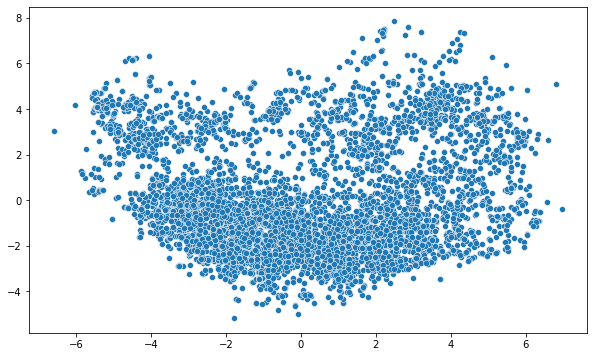

In [13]:
#Visualizing data using PCA
fig = plt.figure(figsize=(10,6))
pca = PCA(n_components = 2,random_state=42)
df_visual = pca.fit_transform(df_original)
sns.scatterplot(df_visual[:,0], df_visual[:,1], palette ='set2')

# K-Means clustering : Result and Discussion

In [14]:
df_original = df

#Scaled Data ??
df_scaled = StandardScaler().fit_transform(df)

#PCA without scaling
pca = PCA(n_components = 5,random_state=42)
df_PCA = pca.fit_transform(df_original)

#PCA with scaling
df_PCA_scaled = pca.fit_transform(df_scaled)

In [15]:
#PCA scaled
model = KMeans(n_clusters=5,random_state=30)
model.fit(df_PCA_scaled)
cluster = model.labels_
label = model.fit_predict(df_PCA_scaled)
score = silhouette_score(df_PCA_scaled, label, metric='euclidean')

print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.309


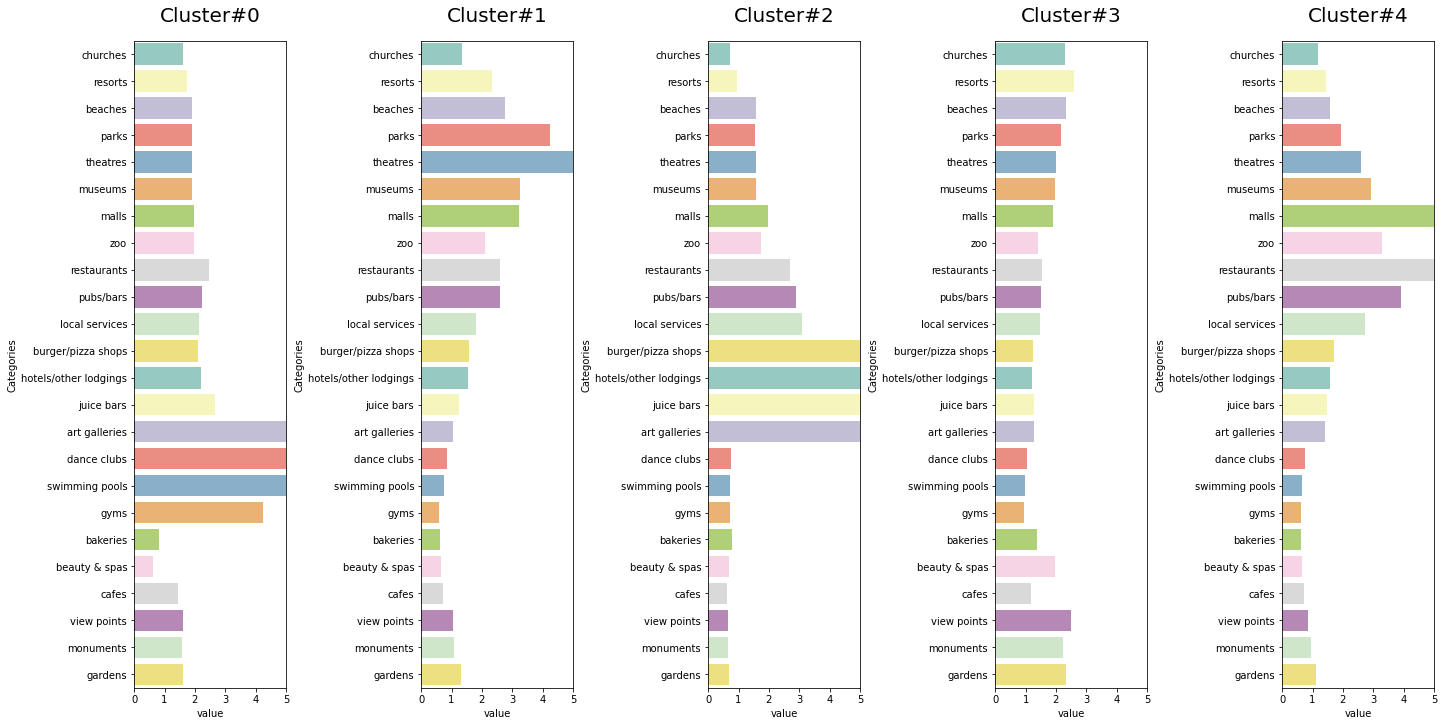

In [29]:
df['cluster'] = model.labels_
df_long = pd.melt(df, "cluster", var_name="categories")

fig = plt.figure(figsize = (20,10))
for i in range(len(df_long.cluster.unique())):
    plt.subplot(1,len(df_long.cluster.unique()),i+1)
    g = sns.barplot(y='categories',x='value',data=df_long[df_long['cluster']==i],palette='Set3',ci=None,estimator=np.median)
#     g.set_xticklabels(g.get_xticklabels(),rotation=90);
    g.set_title(f'Cluster#{i}',y=1.02,fontsize=20)
#     g.set_xlabel("")
    g.set_ylabel('Categories')
    g.set_xlim(0,5)
fig.tight_layout(pad=0.5)
df = df.drop(['cluster'], axis = 1)

In [32]:
df_1 = df_visual[df_visual[:,2]==0]
df_2 = df_visual[df_visual[:,2]==1]
df_3 = df_visual[df_visual[:,2]==2]
df_4 = df_visual[df_visual[:,2]==3]
df_5 = df_visual[df_visual[:,2]==4]

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/pyt

<AxesSubplot:>

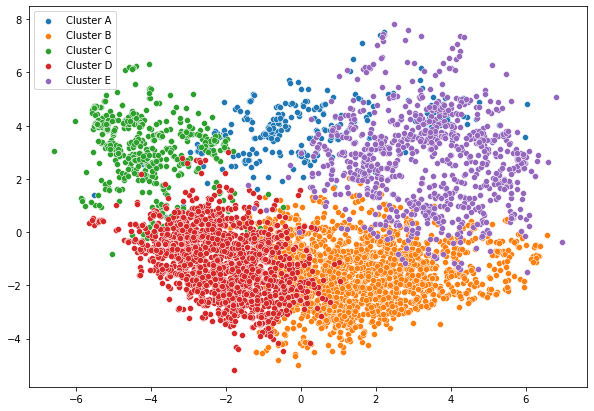

In [39]:
 plt.subplots(figsize=(10, 7))
sns.scatterplot(df_1[:,0], df_1[:,1], label = 'Cluster A', palette = 'deep' )
sns.scatterplot(df_2[:,0], df_2[:,1], label = 'Cluster B', palette = 'deep' )
sns.scatterplot(df_3[:,0], df_3[:,1], label = 'Cluster C', palette = 'deep' )
sns.scatterplot(df_5[:,0], df_5[:,1], label = 'Cluster D', palette = 'deep' )
sns.scatterplot(df_4[:,0], df_4[:,1], label = 'Cluster E', palette = 'deep' )


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


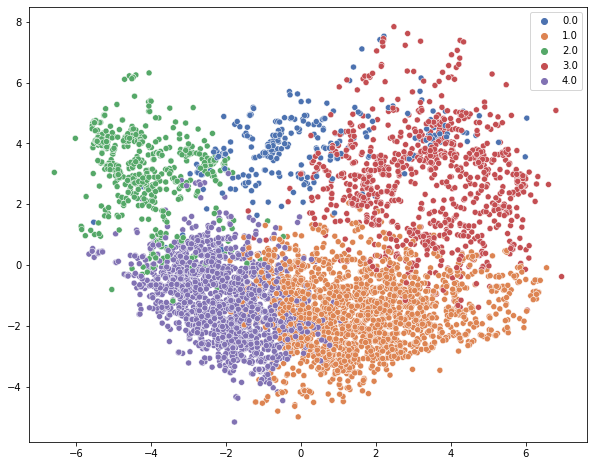

In [31]:
df_visual = np.c_[df_visual,model.labels_]
f, ax = plt.subplots(figsize=(10, 8))
s = sns.scatterplot(df_visual[:,0], df_visual[:,1], hue = df_visual[:,2], palette = 'deep' )


In [17]:
#df_scaled
model2 = KMeans(n_clusters=5,random_state=30)
model2.fit(df_scaled)
cluster = model2.labels_

score = silhouette_score(df_scaled, cluster, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.151


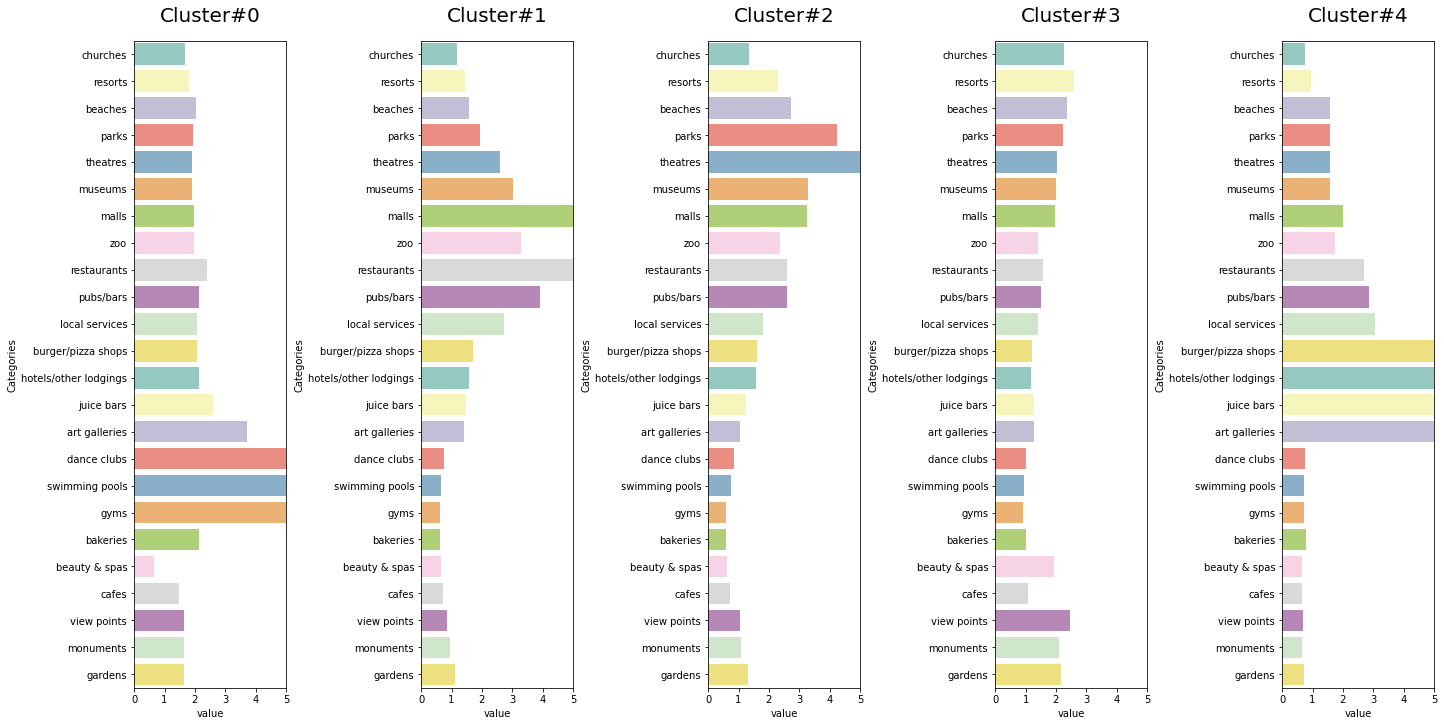

In [18]:
df['cluster'] = model2.labels_
df_long2 = pd.melt(df, "cluster", var_name="categories")

fig = plt.figure(figsize = (20,10))
for i in range(len(df_long2.cluster.unique())):
    plt.subplot(1,len(df_long2.cluster.unique()),i+1)
    g = sns.barplot(y='categories',x='value',data=df_long2[df_long2['cluster']==i],palette='Set3',ci=None,estimator=np.median)

    g.set_title(f'Cluster#{i}',y=1.02,fontsize=20)

    g.set_ylabel('Categories')
    g.set_xlim(0,5)
fig.tight_layout(pad=0.5)
df = df.drop(['cluster'], axis = 1)

### K means ++

In [19]:
def euclidean_distance(centeroid, data):
    return np.sqrt(np.sum((centeroid - data)**2, axis=1))

In [20]:
class KMPlus:
    def __init__(self, k , max_iter):
    #k represents no. of clusters
        self.k = k
        self.max_iter = max_iter
        
        
    def initialize(self, df):
        #choosing first centroid at random.
    
        self.centroids = [random.choice(df)]
        for i in range(self.k-1):
            # Calculate distances from points to the centroids
            distances = np.sum([euclidean_distance(centroid, df) for centroid in self.centroids], axis=0)
            distances /= np.sum(distances)
            # Picking the remaining centroids farthest from the first centroid 
            new_centroid, = np.random.choice(range(len(df)), size = 1, p=distances)
            self.centroids += [df[new_centroid]]
    
        itr = 0
        prev_centroids = None
        while np.not_equal(self.centroids, prev_centroids).any() and itr < self.max_iter:
            # assigning each data point to nearest centroid
            #Creating a list of lists
            clustered_points = [[] for i in range(self.k)] 
            
            for sample in df:
                distances = euclidean_distance(sample, self.centroids)
                centroid_index = np.argmin(distances)
                clustered_points[centroid_index].append(sample)
            
            prev_centroids = self.centroids
            self.centroids = [np.mean(_ , axis=0) for _ in clustered_points]
            for i, centroid in enumerate(self.centroids):
            # Catch any np.nans, resulting from a centroid having no points
                if np.isnan(centroid).any():  
                    self.centroids[i] = prev_centroids[i]
            itr += 1
            
    def labels(self, df):
        centroids = []
        labels = []
        for sample in df:
            distances = euclidean_distance(sample, self.centroids)
            centroid_index = np.argmin(distances)
            centroids.append(self.centroids[centroid_index])
            labels.append(centroid_index)
        return centroids, labels
    


In [21]:
#Kmeans++ on df_PCA_scaled
k = 5
kmeans = KMPlus(k, 500)
kmeans.initialize(df_PCA_scaled)
class_centers, classification = kmeans.labels(df_PCA_scaled)
score = silhouette_score(df_PCA_scaled, classification, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.279


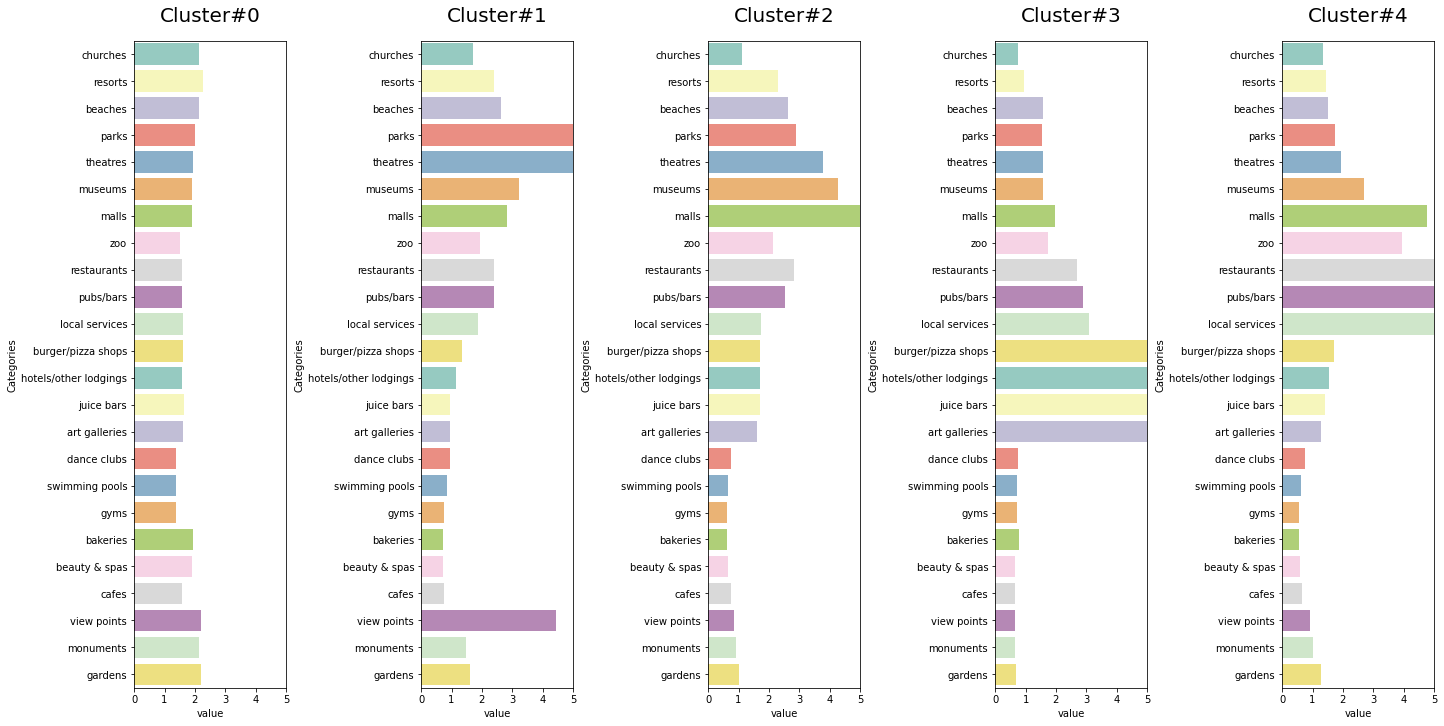

In [22]:
df['cluster'] = classification
df_long2 = pd.melt(df, "cluster", var_name="categories")

fig = plt.figure(figsize = (20,10))
for i in range(len(df_long2.cluster.unique())):
    plt.subplot(1,len(df_long2.cluster.unique()),i+1)
    g = sns.barplot(y='categories',x='value',data=df_long2[df_long2['cluster']==i],palette='Set3',ci=None,estimator=np.median)

    g.set_title(f'Cluster#{i}',y=1.02,fontsize=20)

    g.set_ylabel('Categories')
    g.set_xlim(0,5)
fig.tight_layout(pad=0.5)
df = df.drop(['cluster'], axis = 1)

### Trying other clustering algorithms


In [23]:
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import rand_score
from sklearn.manifold import SpectralEmbedding

### Gaussian Mixture

In [24]:
gmm = GaussianMixture(n_components = 5,covariance_type = 'spherical', max_iter = 300,random_state=30)
gm_labels = gmm.fit_predict(df_PCA_scaled)
gm_centers = gmm.means_
print ("gmm: silhouttte: ", silhouette_score(df_PCA_scaled, gm_labels))

gmm: silhouttte:  0.30746614605353617


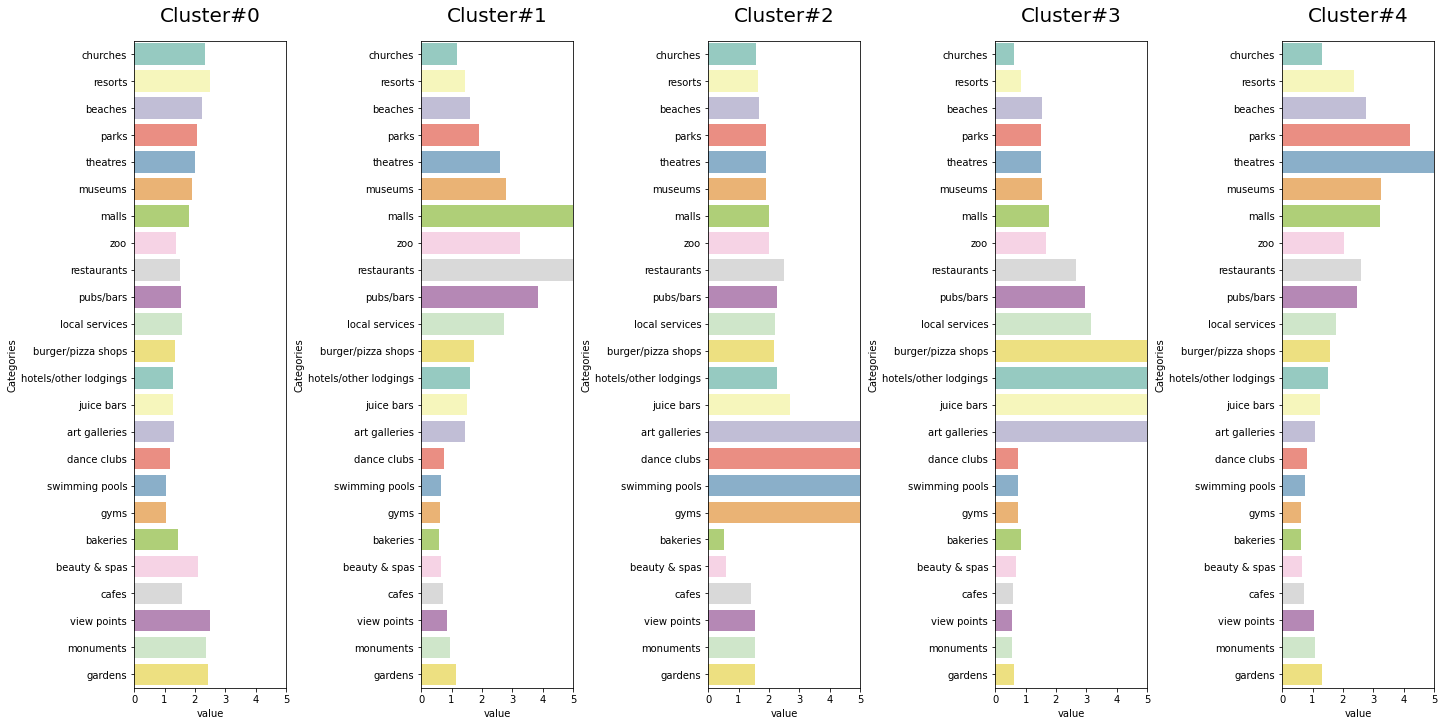

In [25]:
df['cluster'] = gm_labels
df_long3 = pd.melt(df, "cluster", var_name="categories")

fig = plt.figure(figsize = (20,10))
for i in range(len(df_long3.cluster.unique())):
    plt.subplot(1,len(df_long3.cluster.unique()),i+1)
    g = sns.barplot(y='categories',x='value',data=df_long3[df_long3['cluster']==i],palette='Set3',ci=None,estimator=np.median)

    g.set_title(f'Cluster#{i}',y=1.02,fontsize=20)

    g.set_ylabel('Categories')
    g.set_xlim(0,5)
fig.tight_layout(pad=0.5)
df = df.drop(['cluster'], axis = 1)

### Spectral Clustering algorithm

In [26]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters=5, eigen_solver=None,
    n_components=5,
    random_state=30,
    n_init=10,
    n_neighbors=10,
    eigen_tol=0.0,
    assign_labels='discretize')
spec_labels = model.fit_predict(df_PCA_scaled)

print ("SC: silhouttte: ", silhouette_score(df_PCA_scaled, spec_labels))

SC: silhouttte:  0.2990712787441789


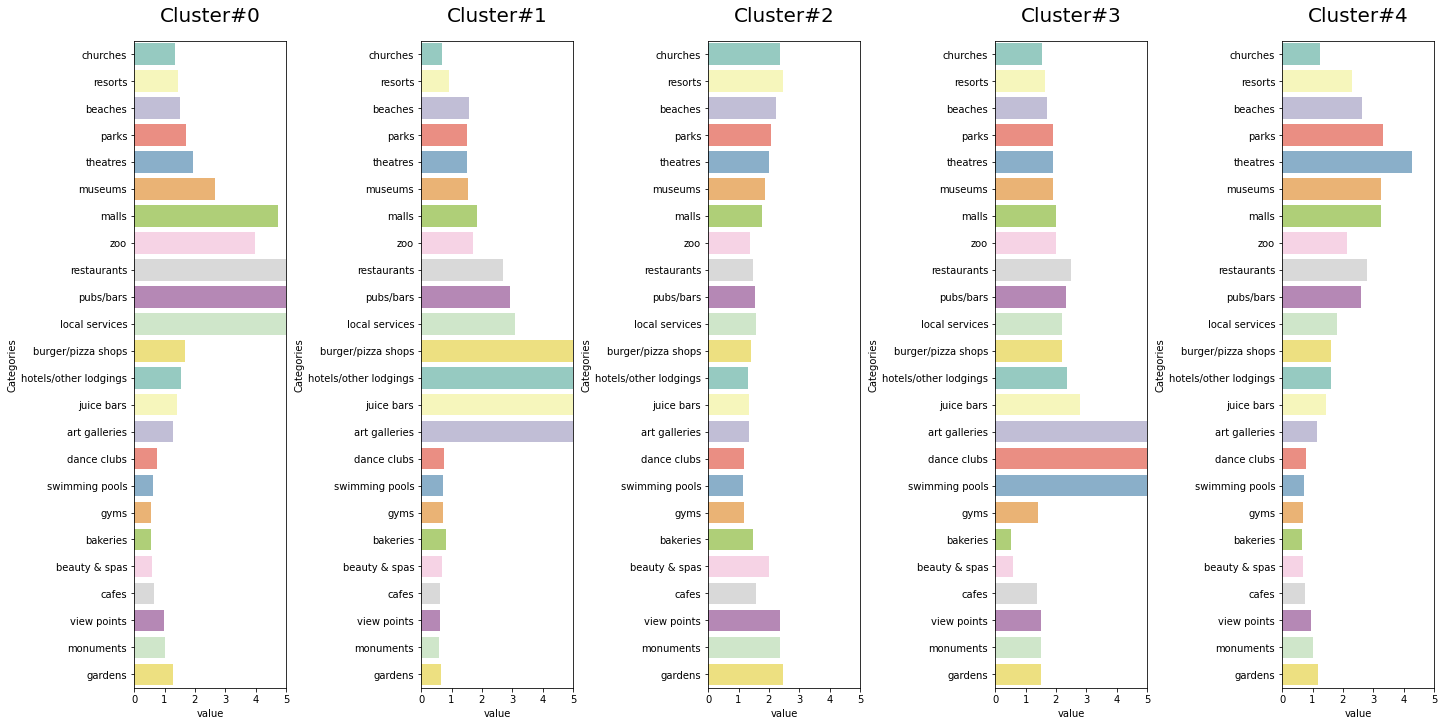

In [27]:
df['cluster'] = spec_labels
df_long7 = pd.melt(df, "cluster", var_name="categories")

fig = plt.figure(figsize = (20,10))
for i in range(len(df_long7.cluster.unique())):
    plt.subplot(1,len(df_long7.cluster.unique()),i+1)
    g = sns.barplot(y='categories',x='value',data=df_long7[df_long7['cluster']==i],palette='Set3',ci=None,estimator=np.median)

    g.set_title(f'Cluster#{i}',y=1.02,fontsize=20)

    g.set_ylabel('Categories')
    g.set_xlim(0,5)
fig.tight_layout(pad=0.5)
df = df.drop(['cluster'], axis = 1)

### Agglomerative Hierarchical Clustering : Ward


In [28]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters = 5, affinity='euclidean',linkage='ward').fit(df_PCA_scaled)
wlabels = clustering.labels_
print ("ward: silhouttte: ", silhouette_score(df_PCA_scaled, wlabels))

ward: silhouttte:  0.2913472634361442


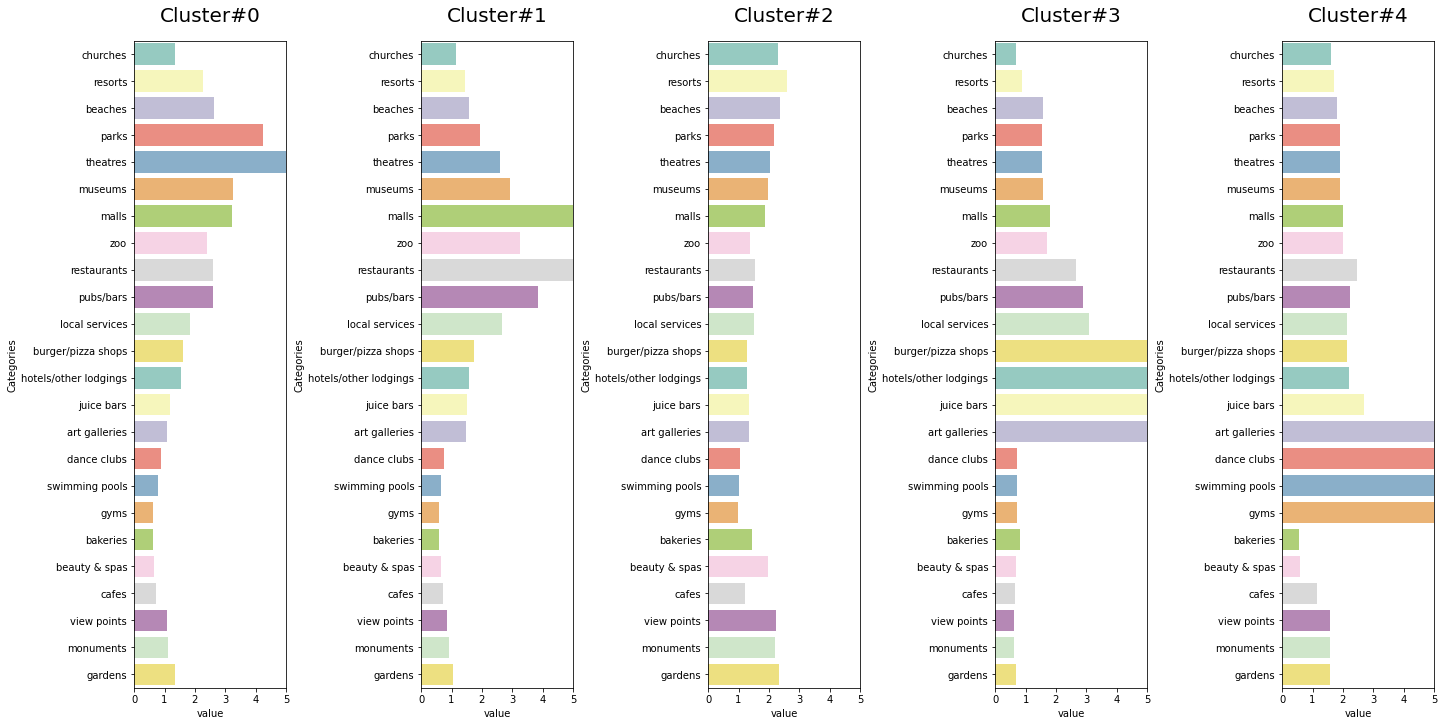

In [29]:
df['cluster'] = wlabels
df_long5 = pd.melt(df, "cluster", var_name="categories")

fig = plt.figure(figsize = (20,10))
for i in range(len(df_long5.cluster.unique())):
    plt.subplot(1,len(df_long5.cluster.unique()),i+1)
    g = sns.barplot(y='categories',x='value',data=df_long5[df_long5['cluster']==i],palette='Set3',ci=None,estimator=np.median)

    g.set_title(f'Cluster#{i}',y=1.02,fontsize=20)

    g.set_ylabel('Categories')
    g.set_xlim(0,5)
fig.tight_layout(pad=0.5)
df = df.drop(['cluster'], axis = 1)

### BIRCH

In [30]:
from sklearn.cluster import Birch
brc = Birch(n_clusters=5,threshold = 0.1)
brc.fit(df_PCA_scaled)
blabels = brc.predict(df_PCA_scaled)
print ("birch: silhouttte: ", silhouette_score(df_PCA_scaled, blabels))

birch: silhouttte:  0.2917143863586475


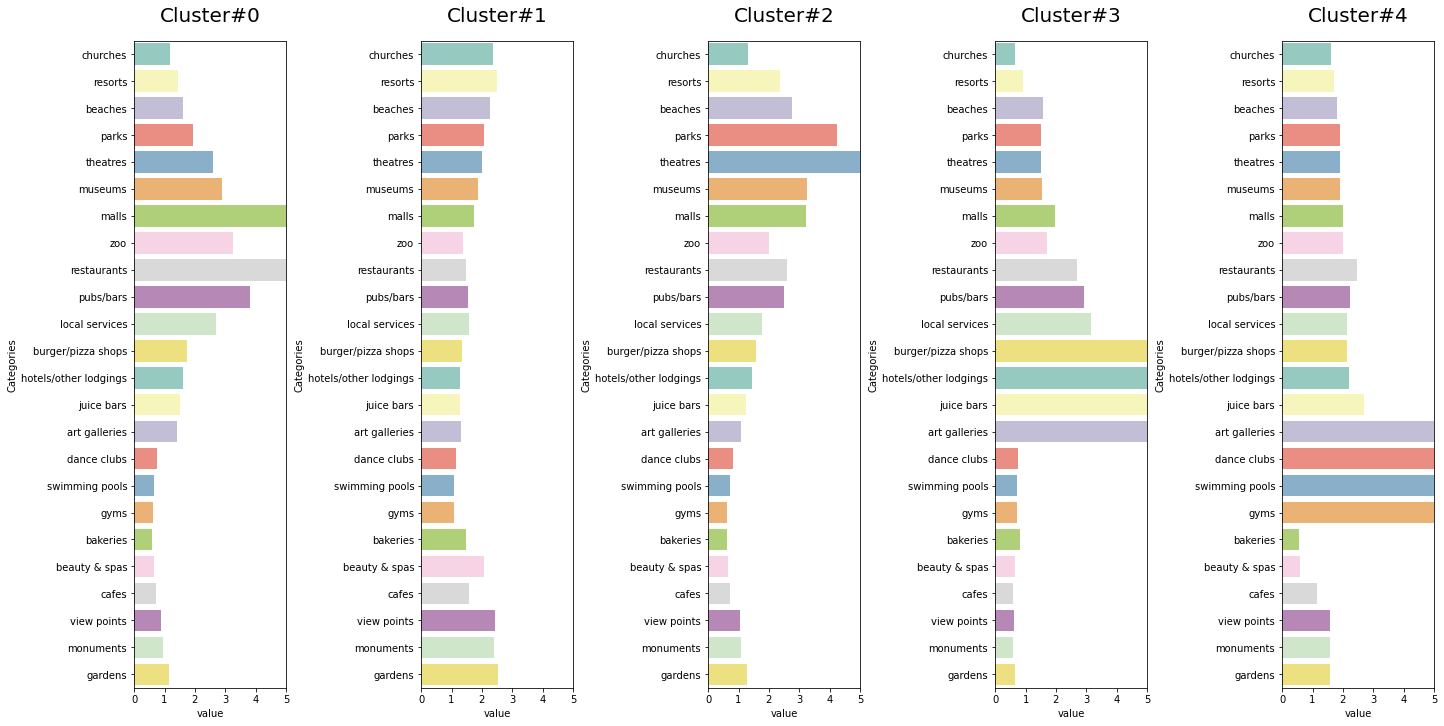

In [31]:
df['cluster'] = blabels
df_long4 = pd.melt(df, "cluster", var_name="categories")

fig = plt.figure(figsize = (20,10))
for i in range(len(df_long4.cluster.unique())):
    plt.subplot(1,len(df_long4.cluster.unique()),i+1)
    g = sns.barplot(y='categories',x='value',data=df_long4[df_long4['cluster']==i],palette='Set3',ci=None,estimator=np.median)

    g.set_title(f'Cluster#{i}',y=1.02,fontsize=20)

    g.set_ylabel('Categories')
    g.set_xlim(0,5)
fig.tight_layout(pad=0.5)
df = df.drop(['cluster'], axis = 1)


### Affinity Propagation

In [32]:
from sklearn.cluster import AffinityPropagation

clustering = AffinityPropagation(damping = 0.9, preference=-3000,
                                 affinity = 'euclidean',random_state=30 ).fit(df_PCA_scaled)

APlabels = clustering.labels_
print ("Affinity Propagation: silhouette: ", silhouette_score(df_PCA_scaled, APlabels))

Affinity Propagation: silhouette:  0.30588944013204866


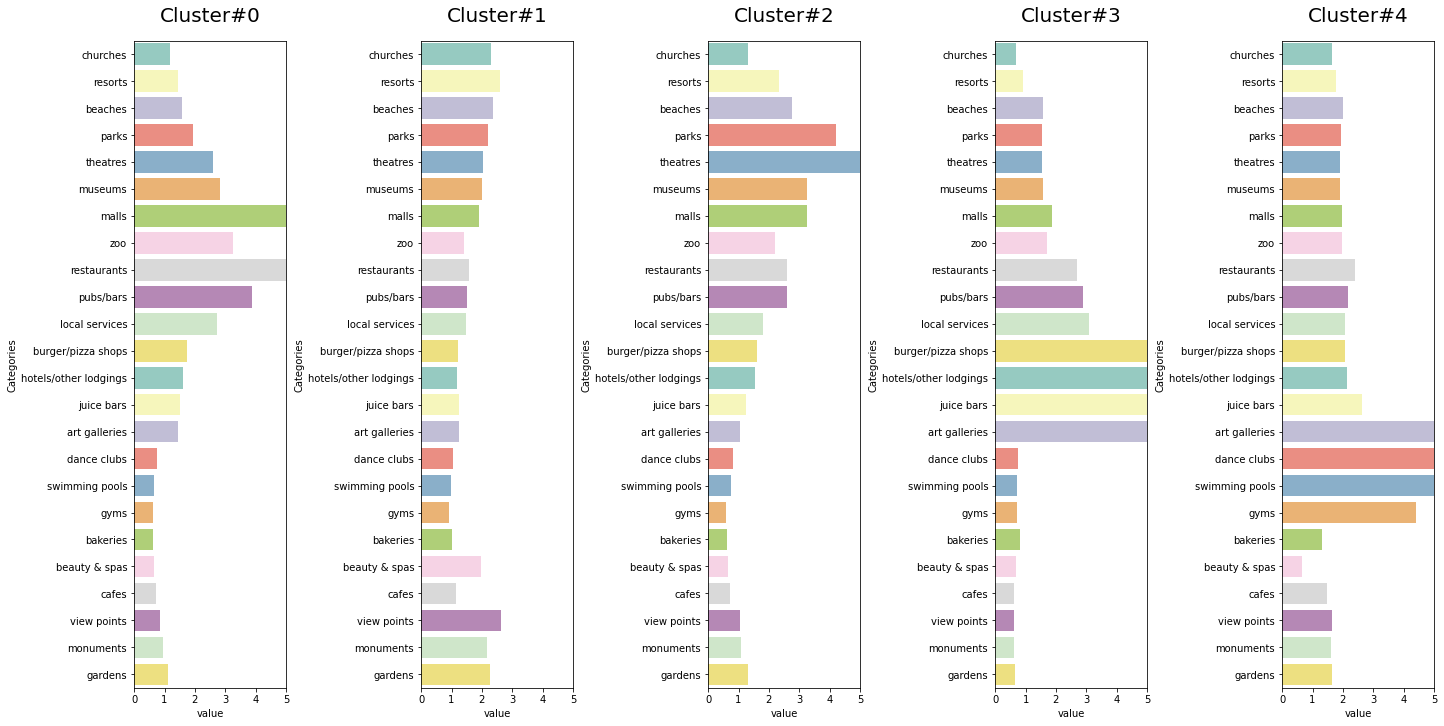

In [33]:
df['cluster'] = APlabels
df_long6 = pd.melt(df, "cluster", var_name="categories")

fig = plt.figure(figsize = (20,10))
for i in range(len(df_long6.cluster.unique())):
    plt.subplot(1,len(df_long6.cluster.unique()),i+1)
    g = sns.barplot(y='categories',x='value',data=df_long6[df_long6['cluster']==i],palette='Set3',ci=None,estimator=np.median)

    g.set_title(f'Cluster#{i}',y=1.02,fontsize=20)

    g.set_ylabel('Categories')
    g.set_xlim(0,5)
fig.tight_layout(pad=0.5)
df = df.drop(['cluster'], axis = 1)